In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.linear_model import LogisticRegression,  LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
from cv2 import resize
from scipy.linalg import eigh # eigen value and eigen vector for dimentally reduction 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics



In [2]:
def predict_majority(input_):
    c = Counter(list(input_))
    c.most_common(1)
    return(c.most_common(1))
    
def plot_num(digits_,numbers, img_size):
    if type(numbers) ==int:
        plt.imshow(digits_[numbers].reshape(img_size, img_size))
        plt.show()
    else:
        for num in numbers:
            plt.imshow(digits_[num].reshape(img_size, img_size))
            plt.show()

def masked_non_zeros(data):
    masked =np.all(data ==0, axis= 0 )
    masked = np.where(masked==True,False, True)
    masked_digit = data[:, masked]

    return masked_digit

def normlized_data(masked_digit):
    """
    (x_i - mean) / std
    remove mean to the origin
    std = 1 for any feature
    """
    row,col = masked_digit.shape
    for co in range(col):
        mean  = masked_digit[:,co].mean()
        std = masked_digit[:,co].std()
        masked_digit[:,co] = (masked_digit[:,co] - mean)/std
    return masked_digit # return normllized 


mnist_data = pd.read_csv('mnist.csv').values

labels = mnist_data[:, 0] # ==> <class 'numpy.ndarray'> original R 1x784
digits = mnist_data[:, 1:] # ==> <class 'numpy.ndarray'>
img_size = 28

In [3]:
# if we were predicting the majority of the class: 
[(num, times)]=(predict_majority(labels))
standardized_data= StandardScaler().fit_transform(digits)


D:\Anaconda_2\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

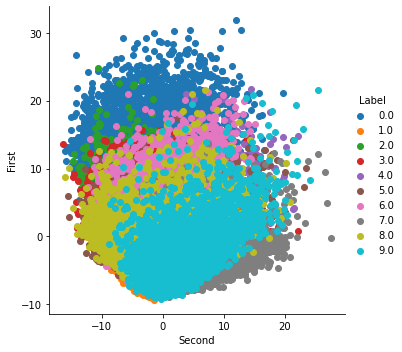

In [13]:
# Remove Features with only 0 values ==> Not a must since it will be taken care at a later stage as well
#non_zero_df = masked_non_zeros(digits)

#Standardize The data
#coverience_mat = np.dot(standardized_data.T,standardized_data)
#values_all, vectors_all = eigh(coverience_mat, eigvals=[706,707]) # ,eigvals=[700,707]

# Transform The Data Manually

#transformsed_data = np.dot(vectors_all.T, standardized_data.T)
#stacked_standarzided = np.vstack((labels, transformsed_data)).T

#PCA
pca = decomposition.PCA()
pca.n_components = 2
data_pca = pca.fit_transform(standardized_data)
stacked = np.vstack((data_pca.T, labels)).T
df_2 = pd.DataFrame(stacked, columns = { "Label","First", "Second"})
sns.FacetGrid(df_2, hue ="Label", size = 5).map(plt.scatter, "Second","First").add_legend()
plt.show

## Check The amount of PCA Needed

<function matplotlib.pyplot.show(close=None, block=None)>

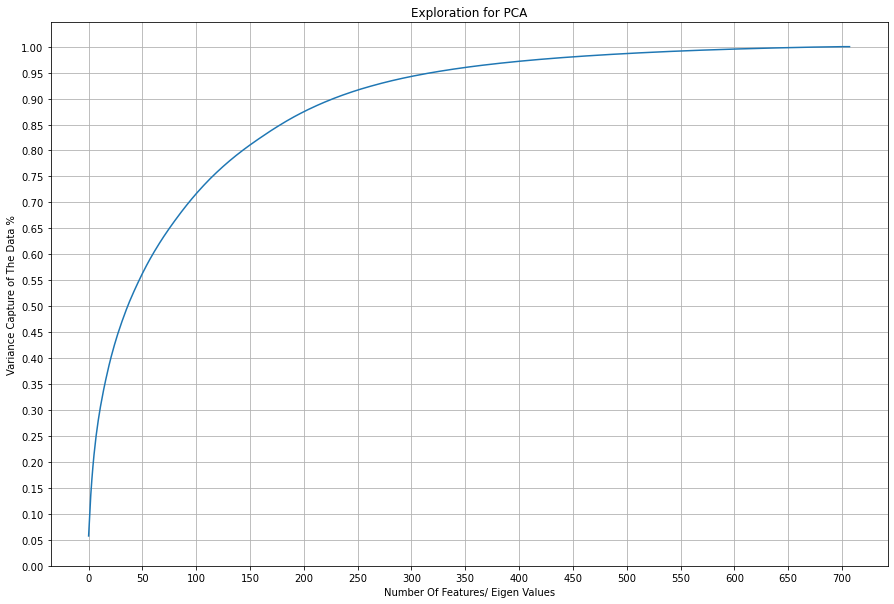

In [4]:
pca_2 = decomposition.PCA()
pca_2.n_components = 708
pca_data = pca_2.fit_transform(standardized_data)

Percentage_var = pca_2.explained_variance_/ np.sum(pca_2.explained_variance_)
cum_percentage_var = np.cumsum(Percentage_var)

cum_percentage_var_list  = list(cum_percentage_var)
fig = plt.figure(figsize=(15,10))

plt.title("Exploration for PCA")
plt.plot(cum_percentage_var_list)
plt.grid()
plt.xticks(np.arange(0, 750,50))
plt.yticks(np.arange(0, 1.05,0.05))
plt.ylabel("Variance Capture of The Data %")
plt.xlabel("Number Of Features/ Eigen Values")

plt.show

In [ ]:
def model_get_best_grid_params(model):
    name_model =str(model)[:-2]
    if name_model =="MLPClassifier":
        return (name_model, {'alpha': [0.01, 0.1, 0.25, 0.5, 1, 2.5, 10]})
    elif name_model =="LogisticRegressionCV":
        return (name_model, {"l1_ratios":[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]})
    elif name_model =="LogisticRegression":
        return( name_model, {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 0.25, 0.5, 1, 2.5, 10]})
    elif name_model == "SVC":
        return (name_model, {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']})


In [5]:
sum_intensity = np.sum(digits,axis= 0)
most_frequqnt_pixel = np.argmax(sum_intensity)

array_pixel_by_digit = [[0] for i in range(10)]
num_occur = [[0] for i in range(10)]

validate = [[0] for i in range(10)]
for idx, num in enumerate(labels):
    curr_pixel_row = np.expand_dims(digits[idx,:],axis=0) 
    num_array_array = array_pixel_by_digit[num]
    num_occur[num][0] +=1
    
    if (type(num_array_array[0])==int):
        array_pixel_by_digit[num] =curr_pixel_row
    else: 
        passed_rows = num_array_array
        concat_mat = np.concatenate((curr_pixel_row, passed_rows), axis = 0)
        array_pixel_by_digit[num] = concat_mat


Spread of 10 Most Important Pixels Per Digit  
Spread of 50 Most Important Pixels Per Digit  
Spread of 90 Most Important Pixels Per Digit  


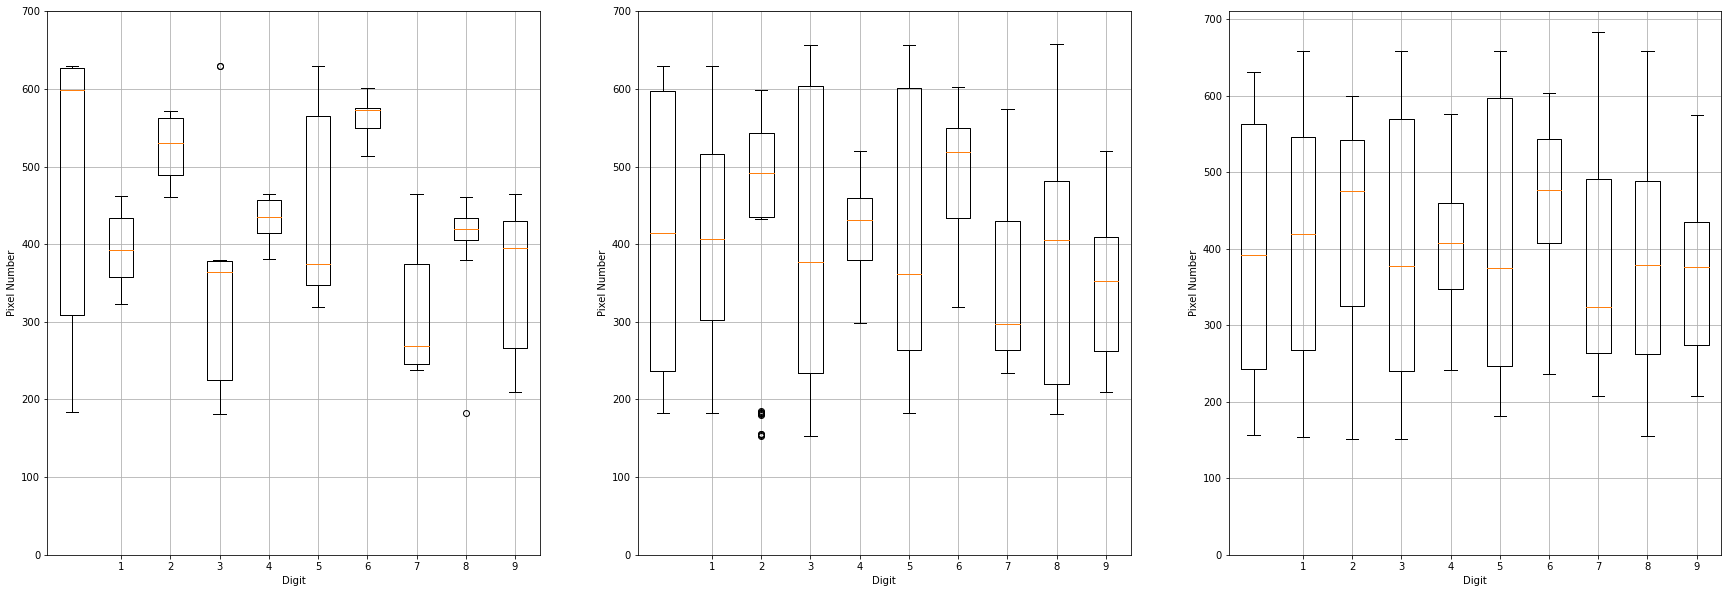

In [11]:
ys = []
y = []
x = list([np.arange(10)])

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30,10), squeeze=False)

for n , num_features in zip (range(3),np.arange(10,180,40)) :

    for num in range(10):
        inx_max = np.argmax(np.average(array_pixel_by_digit[num], axis = 0))
        importance_pixel  = np.argsort(np.average(array_pixel_by_digit[num], axis = 0))[-num_features::]
        y.append(importance_pixel)
    
    ys.append(y)
    y =[]
    #plot
    data = [(ys[n][l]) for  l in range(len(ys[n]))]
    ax[0,n].boxplot(data)
    ax[0,n].yaxis.set_ticks((np.arange(0, 780, 100)))
    ax[0,n].xaxis.set_ticks(np.arange(2,11,1))
    ax[0,n].grid()
    ax[0,n].set_xlabel("Digit")
    ax[0,n].set_ylabel("Pixel Number")

    print(f"Spread of {num_features} Most Important Pixels Per Digit  ")



plt.show()

In [7]:
data_10_pix_loc = ([ys[2][i] for i in range(len(ys[0]))])
data_10_array =  np.array(data_10_pix_loc)
print(data_10_array.shape)


(10, 90)


In [21]:
concat.shape

(42000, 784)

In [32]:
np.set_printoptions(threshold=None)
del np
import numpy as np
mist_mask = pd.read_csv('mnist.csv').values
digit = mist_mask[:,1:]
concat =0
standardized_data= StandardScaler().fit_transform(mist_mask[:,1:])

for idx, list_loc in enumerate(data_10_array):
    not_included = [x for x in range(1,784) if x not in list(list_loc)]
    print("not_included")
    
    masked = standardized_data[standardized_data[:,0]==idx]

    #masked[:,list(list_loc)]= np.array(np.max(masked)) #           np.ones(1)  #
    print("masked_1")
    masked[:,not_included]=np.zeros(1)
    print("masked_2")
    print(idx)
    masked[:,0] = np.array(idx)
    print(np.sum(masked[:,0]))

    if isinstance(concat, np.ndarray):
        concat = np.concatenate((concat,masked), axis = 0)
        np.random.shuffle(concat)
        print("concat")
    else: 
        concat = masked


    #masked_data_to_50=np.where(mnist_data[mnist_data[:,0] ==idx],mnist_data[:, list(list_loc)] ==np.ones((d_masked,785)).T, np.zeros((d_masked,785)).T) #mnist_data[:,list(list_loc)]==1,0

    
    



not_included
masked_1
masked_2
0
0.0
not_included
masked_1
masked_2
1
0.0
concat
not_included
masked_1
masked_2
2
0.0
concat
not_included
masked_1
masked_2
3
0.0
concat
not_included
masked_1
masked_2
4
0.0
concat
not_included
masked_1
masked_2
5
0.0
concat
not_included
masked_1
masked_2
6
0.0
concat
not_included
masked_1
masked_2
7
0.0
concat
not_included
masked_1
masked_2
8
0.0
concat
not_included
masked_1
masked_2
9
0.0
concat


In [23]:
params= {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}

tuned_params = GridSearchCV(SVC(), params, cv=5, n_jobs=-1)

x_train,X_test, y_train, y_test = train_test_split(concat[:,1:], concat[:,0], test_size=0.2)
model = LogisticRegressionCV(cv=5, random_state=0)

model.fit(x_train,y_train)
predict = model.predict(X_test)

confusion_matrix_l1 = metrics.confusion_matrix(predict,y_test)
accuracy_l1         = metrics.accuracy_score(predict,y_test)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 0.0

In [31]:
np.sum(concat)

1.2885692513009417e-11

In [29]:
np.sum(concat[:,0])

0.0

In [2]:
np.sum(concat[0])/255

NameError: name 'np' is not defined

In [1]:
print("ff")

ff
